In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

In [6]:
#Loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [ ]:
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills = df.job_skills.apply(lambda x : ast.literal_eval(x) if pd.notna(x) else (x))

Filter for US Data Analyst Roles

In [9]:
df_da_us = df[(df.job_title_short=='Data Analyst') & (df.job_country == 'United States')]

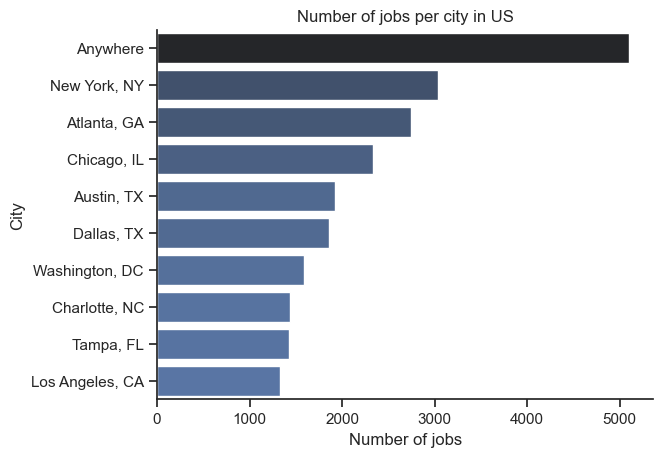

In [27]:
df_plot = df_da_us.job_location.value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot , x='count' , y=df_plot.index , hue='count' , palette='dark:b_r' , legend=False)
sns.despine()
plt.title('Number of jobs per city in US')
plt.xlabel('Number of jobs')
plt.ylabel('City')
plt.show()

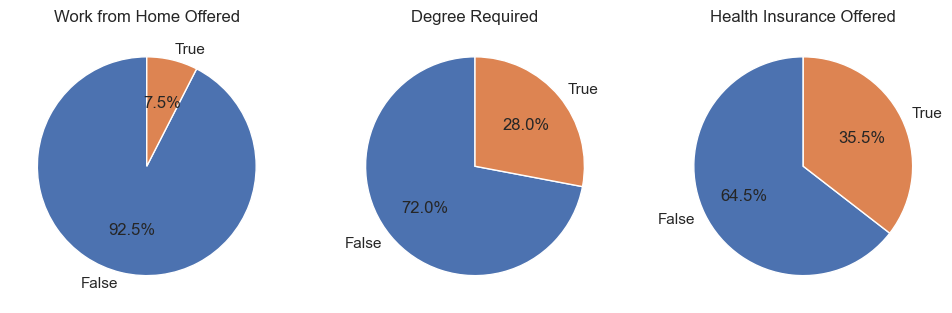

In [36]:
dict_column = {
    'job_work_from_home' : 'Work from Home Offered',
    'job_no_degree_mention' : 'Degree Required',
    'job_health_insurance' : 'Health Insurance Offered'
} 
fig , ax = plt.subplots(1 , 3)
fig.set_size_inches((12 , 5))

for i , (column , title) in enumerate(dict_column.items()):
    # print(i , column , title)
    ax[i].pie(df_da_us[column].value_counts() , autopct = '%1.1f%%' , labels = ['False' , 'True'] , startangle = 90)
    ax[i].set_title(title)
plt.show()

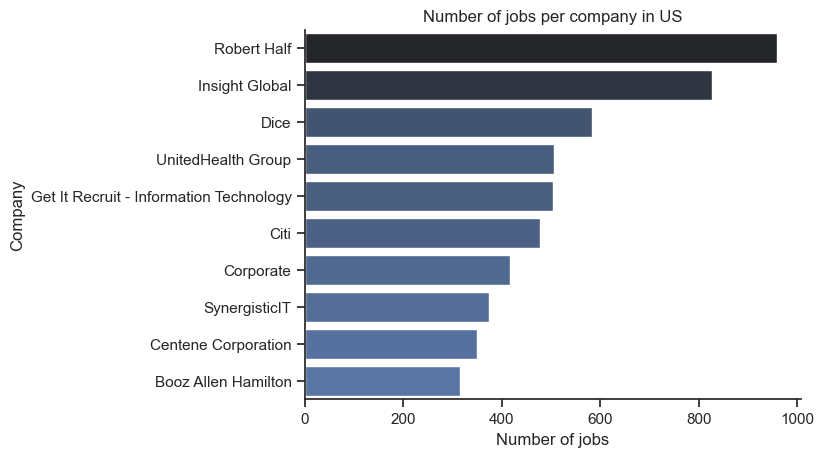

In [38]:
df_plot = df_da_us.company_name.value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot , x='count' , y=df_plot.index , hue='count' , palette='dark:b_r' , legend=False)
sns.despine()
plt.title('Number of jobs per company in US')
plt.xlabel('Number of jobs')
plt.ylabel('Company')
plt.show()

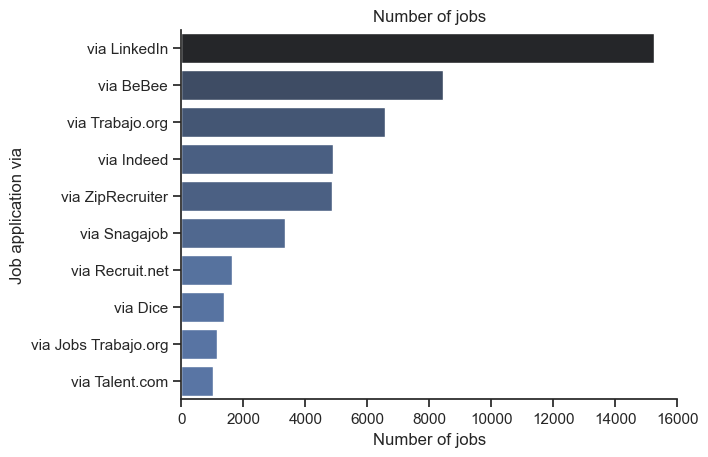

In [45]:
df_plot = df_da_us.job_via.value_counts().head(10).to_frame()
sns.barplot(data=df_plot , x ='count' , y=df_plot.index , hue='count' , palette='dark:b_r' , legend=False)
sns.despine()
plt.title('Number of jobs')
plt.xlabel('Number of jobs')
plt.ylabel('Job application via')
plt.show()

In [46]:
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"['r', 'zoom']","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"['word', 'excel', 'powerpoint', 'outlook']","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"['sas', 'sas', 'word', 'excel']","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"['oracle', 'azure', 'power bi', 'excel', 'word...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","['sql', 'vba', 'python', 'excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,['microsoft teams'],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
